In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the wine dataset
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# check data sample
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# Separate the target and predictor variables
y = df['target']
X = df.drop('target', axis=1)

# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133,) (45,)


In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Create a PCA object
pca = PCA(n_components=2, random_state=42)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca.shape

(178, 2)

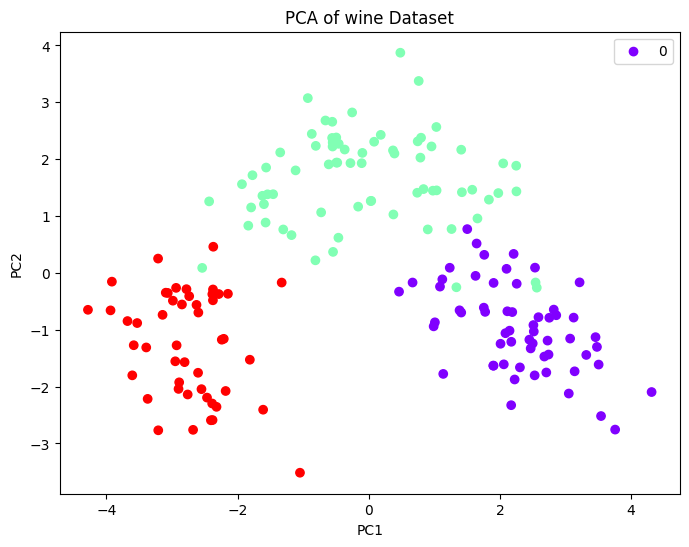

In [15]:
# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of wine Dataset')
plt.legend(labels=np.unique(y))
plt.show()

In [16]:
# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [17]:
0.36198848 + 0.1920749

0.55406338